<a href="https://colab.research.google.com/github/TheDon57/MODS_Exercises/blob/main/Week_5_exercise/LM_Week_05_BikeSharing_Extended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LM - Week 05 - BikeSharing Extended

## Introduction
In last week's tutorial we explored the basics of linear regression and applied it to a [__Bikesharing dataset__](https://www.kaggle.com/c/bike-sharing-demand/overview) in order to predict the number of bike rentals based on weather information.  
This week we will extend our toolbox by useful methods, such as __categorical predictors__ and __non-linear transformations__, to further increase our models' performance and utilize all the information at hand.

In [1]:
import numpy as np
import random
# Set seed for reproducibility
np.random.seed(42)  # Set seed for NumPy
random.seed(42) # Set seed for random module

# Load Data
First we need to load the Bikesharing dataset.

*Run the code below.*

In [2]:
import pandas as pd

# Loading the data from a csv file
data = pd.read_csv("https://raw.githubusercontent.com/kbrennig/MODS_WS25_26/refs/heads/main/data/BikeSharing.csv")

## Explore Data

If we look at the data again, we see that there are columns that we knowingly left out the last time, e.g. __season__ or __workingday__. More precisely, these are so-called __categorical__ variables, which can take a discrete value from a finite set of values (as opposed to numerical properties, which can take virtually any number on an infinitely accurate number line).

*Run the code below.*

In [3]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000
mean,2.511988,0.026558,0.682036,1.426411,19.751988,23.157086,63.405017,12.924144,28.737920,115.485430,144.223349
std,1.114603,0.160804,0.465728,0.647407,7.951694,8.619132,19.780518,8.354137,39.554419,108.847868,133.312123
min,1.000000,0.000000,0.000000,1.000000,2.460000,3.030000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.120000,15.910000,49.000000,7.001500,3.000000,27.000000,32.000000
50%,3.000000,0.000000,1.000000,1.000000,19.680000,23.485000,64.000000,12.998000,13.000000,91.000000,111.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,79.000000,19.001200,38.000000,168.000000,210.000000
max,4.000000,1.000000,1.000000,3.000000,38.540000,43.940000,100.000000,56.996900,272.000000,567.000000,638.000000


## Create training and test sets

Now let's create our training and test sets from our data.

*Run the code below.*

In [4]:
from sklearn.model_selection import train_test_split
data_training, data_test = train_test_split(data, test_size=0.2, random_state=42)

### Model

When it comes to training our linear regression model, not much has changed compared to last week. We can add categorical variables by putting `C()` around the predictor.

*Run the code below.*

In [5]:
from statsmodels.formula.api import ols

model_01 = ols(formula="count ~ temp + C(season)", data=data_training)
model_01 = model_01.fit()

print(model_01.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
No. Observations:                4337   F-statistic:                     333.2
Covariance Type:            nonrobust   Prob (F-statistic):          2.38e-250
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -42.3815      5.477     -7.739      0.000     -53.119     -31.645
C(season)[T.2]   -21.9329      6.440     -3.406      0.001     -34.559      -9.307
C(season)[T.3]   -57.6987      7.912     -7.292      0.000     -73.211     -42.186
C(season)[T.4]    30.8556      5.348      5.769      0.000      20.371      41.341
temp              10.0407      0.363     27.680      0.000       9.329      10.752

Notes:
[1] Standard Err

## Non-linear transformations

Non-linear transformations are another very powerful method to increase our model's performance and fit to the data, since it is unrealistic to expect linear relations in most of real-world problems.

### Explore data

If we again look at the data and search for skewed distributions, we can see that the __casual__ variable seems to be extremely skewed. The __casual__ variable stands for the number of bikes rented by non-registered customers (as opposed to __registered__, which stands for registered customers and __count__ = __unregistered__ + __registered__).

When a variable is highly skewed, a small number of very large values stretch the distribution to the right. This can make summary statistics misleading. For example, if the mean of a variable is much larger than its median, it usually indicates that a few extreme values are pulling the mean upward. In our dataset, the __casual__ variable shows this behavior: the average number (__mean__) of casual bike rentals is more than twice the __median__, suggesting a strong right skew.

Skewed variables can cause problems in many types of analysis. They inflate variance, make relationships harder to model, and violate the assumptions of common statistical methods such as linear regression.

A log transformation is a simple way to reduce this skew. Taking the logarithm compresses large values more than small ones, which pulls the long tail inward and produces a more compact, balanced distribution.

*Run the code below.*

In [6]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000
mean,2.511988,0.026558,0.682036,1.426411,19.751988,23.157086,63.405017,12.924144,28.737920,115.485430,144.223349
std,1.114603,0.160804,0.465728,0.647407,7.951694,8.619132,19.780518,8.354137,39.554419,108.847868,133.312123
min,1.000000,0.000000,0.000000,1.000000,2.460000,3.030000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.120000,15.910000,49.000000,7.001500,3.000000,27.000000,32.000000
50%,3.000000,0.000000,1.000000,1.000000,19.680000,23.485000,64.000000,12.998000,13.000000,91.000000,111.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,79.000000,19.001200,38.000000,168.000000,210.000000
max,4.000000,1.000000,1.000000,3.000000,38.540000,43.940000,100.000000,56.996900,272.000000,567.000000,638.000000


To check whether this transformation is helpful, we can compare histograms of the original data and the log-transformed data. The difference in shape helps us see whether the transformation makes the distribution more symmetric and easier to model. In this case, applying `log()` uses the natural logarithm (base __e__).

*Run the code below.*

[]

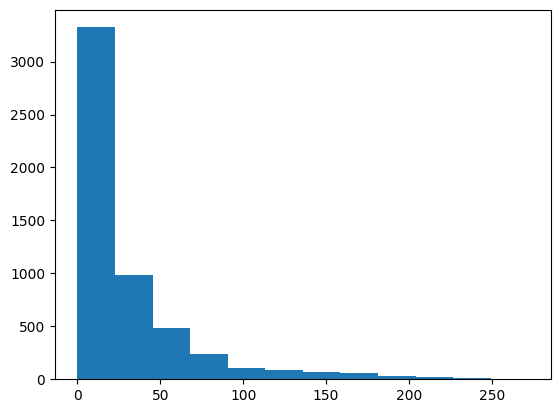

In [7]:
import matplotlib.pyplot as plt
plt.hist(data["casual"], bins=12)
plt.plot()

[]

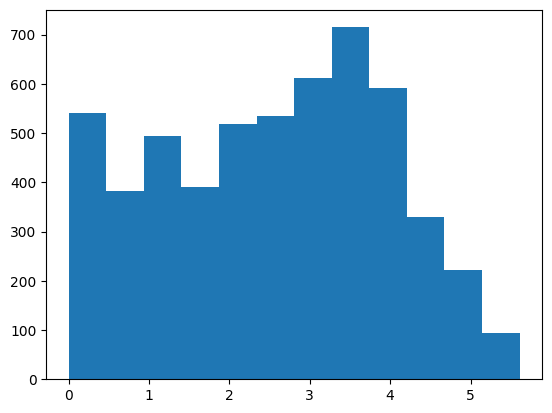

In [8]:
import numpy as np

plt.hist(np.log(data["casual"]+1), bins=12)
plt.plot()

### Transform data

Keep in mind, that we will deviate from our standard output variable __count__ and try to predict the variable __casual__ now, since it serves as a good example.

#### __Create training and test sets__

The training and test set are stored in two different dataframes, namely `data_training_log` and `data_test_log`.

*Run the code below.*

In [9]:
data_training_log, data_test_log = train_test_split(data, test_size=0.2, random_state=42)

### Model

#### __Log Transformation of the dependent variable__

In the following we add a new column to the training dataset where the values of the variable __casual__ are log transformed. You might wonder about the +1 in `np.log(data_training_log["casual"]+1)`.
This is because mathematically log(0) is not defined, so if __casual__ equals 0 in our data, we can not regress for casual = 0.  
For this reason it is common to just add 1 to circumvent it.

What we do in the code below is:
1. We first log transform the variable __casual__ and add it as a new column __casual_log__ to the training dataset.
2. Then we fit the linear regression model. Here we define __casual_log__ as the outcome variable we want to predict and __temp__ as the independent variable. We save our trained model as __model_02__.
3. We display the actual observations of __temp__ and __casual_log__ and then plot the regression line of our model. Thus, we can see how well the linear regression fits.

*Run the code below.*

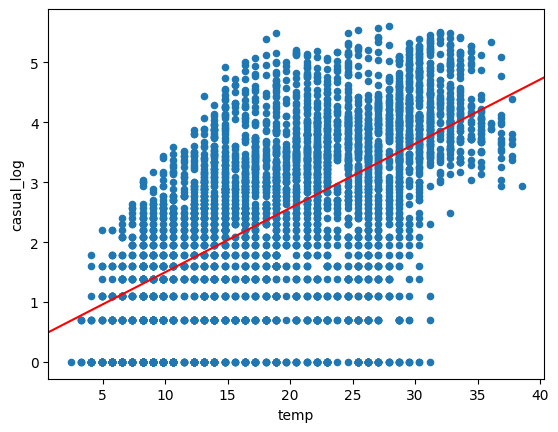

In [10]:
from statsmodels.graphics.regressionplots import abline_plot

# Transforming the casual variable using the natural logarithm and adding it as new column "casual_log" to the training dataset
data_training_log["casual_log"] = np.log(data_training_log["casual"]+1)

# Fitting the linear regression model
model_02 = ols(formula="casual_log ~ temp", data=data_training_log)
model_02 = model_02.fit()

# Displaying the actual observations of temp and casual_log
ax = data_training_log.plot.scatter(x='temp', y='casual_log')
# Plotting the regression line
abline_plot(model_results=model_02, ax=ax, color='red')
plt.show()

To check whether the log transformation actually helped, we now fit another linear regression using the untransformed __casual__ values, again with __temp__ as the independent variable. We’ll store this model as __model_03__.

To visualize the result, we plot the actual observations of __temp__ and __casual__ and overlay the regression line from __model_03__ to see how well it matches the data.

*Run the code below.*

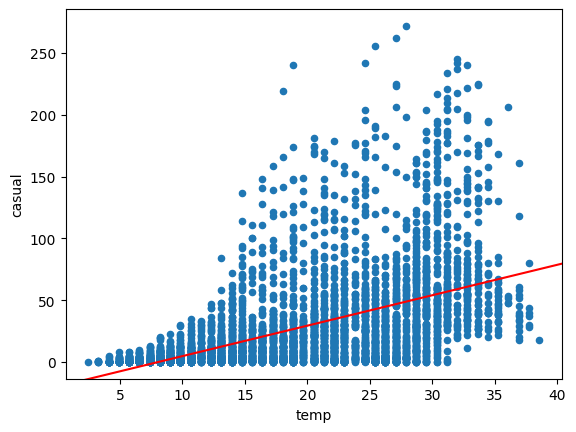

In [11]:
# Fitting the linear regression model
model_03 = ols(formula="casual ~ temp", data=data_training_log)
model_03 = model_03.fit()

# Displaying the actual observations of temp and casual
ax = data_training_log.plot.scatter(x='temp', y='casual')
# Plotting the regression line
abline_plot(model_results=model_03, ax=ax, color='red')
plt.show()

#### __Print fitted models__

Since we used the logarithm of __casual__, the interpretation of the predictor coefficients has changed respectively. We can only tell whether an independent variable has a __positive__ or __negative__ influence but __not directly the magnitude__.

*Run the code below.*

In [12]:
print(model_02.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:             casual_log   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
No. Observations:                4337   F-statistic:                     2363.
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4245      0.047      9.020      0.000       0.332       0.517
temp           0.1073      0.002     48.612      0.000       0.103       0.112

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [13]:
print(model_03.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
No. Observations:                4337   F-statistic:                     1440.
Covariance Type:            nonrobust   Prob (F-statistic):          2.81e-272
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.9364      1.385    -14.390      0.000     -22.653     -17.220
temp           2.4646      0.065     37.943      0.000       2.337       2.592

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


We can clearly see the difference in model fit between the two models.

#### __Make one prediction__

Let's try to predict the outcome for a specific temperature. We want to know how many bikes would be rented if the temperature would equal 35 degrees.

Again: Since we used the logarithm of the variable __casual__ the overall interpretation of our regression changes. This includes the target variable __casual__ which would return a value on a logarithmic scale.

To "undo" this we can simply recalculate our function as an exponential function and subtract 1 in the end.

*Run the code below.*

In [14]:
new_data = pd.DataFrame({"temp":[35]})
prediction = model_02.predict(new_data)
print(np.exp(prediction) -1)

0    64.251989
dtype: float64


#### __Make predictions for all entries in test set and calculate the RMSE__

Now we can make predictions on our held out test set and calculate the RMSE.

Using the code below we:
1. Use __model_02__ to predict log-scaled casual rental values based on __temp__. It is very important to use the test set (__data_test_log__) here as we want to know how well our model performs on previously unseen data, i.e., on data that hasn't been used for training the model. The predicted values are then stored as a new column __casual_log_pred__ in the test dataset.
2. Convert those log-scaled predictions (__casual_log_pred__) back to the original scale using the exponential function. We save these values as a new column __casual_pred__ in the data testset.
3. Calculate and print the RMSE between the actual __casual__ values and the back-transformed predictions __casual_pred__.

*Run the code below.*

In [15]:
from sklearn.metrics import root_mean_squared_error

data_test_log["casual_log_pred"] = model_02.predict(data_test_log["temp"])
# Transforming the predicted values back to the original scale
data_test_log["casual_pred"] = np.exp(data_test_log["casual_log_pred"]) - 1

rmse = root_mean_squared_error(data_test_log["casual"], data_test_log["casual_pred"])
print(rmse)

37.79957884533412


*Adapt the code and calculate the RMSE of the the other model (model_03) on the test data.*

*Write your code below.*

In [ ]:
# Enter your code here!

#### __Polynomial terms__

Another possibility to model non-linearities is to extend our linear models by polynomial terms.

The code below creates a regression model __model_04__ where __casual__ is predicted by __temp__ and the squared temperature term __I(temp**2)__ so the model can capture curvature. Then it fits that model to __data_training_log__ and prints a condensed summary of the fitted model’s statistics.

*Run the code below.*

In [16]:
model_04 = ols(formula="casual ~ temp + I(temp**2)", data=data_training_log)
model_04 = model_04.fit()

print(model_04.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
No. Observations:                4337   F-statistic:                     760.7
Covariance Type:            nonrobust   Prob (F-statistic):          6.83e-284
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9185      2.991      0.307      0.759      -4.946       6.783
temp            -0.0552      0.327     -0.169      0.866      -0.697       0.587
I(temp ** 2)     0.0638      0.008      7.851      0.000       0.048       0.080

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+03. This might indicate that there are
strong multicollinea

#### __Interaction terms__

Last but not least, we can use interaction terms whenever we want to additionally emphasize the relationship between two independent variables.

The code below builds a regression model __model_05__ where __casual__ is predicted by __temp__, __humidity__, and their interaction __(temp:humidity)__. Then it fits the model to __data_training_log__ and prints a compact summary of the fitted model’s results.

*Run the code below.*

In [17]:
model_05 = ols(formula="casual ~ temp + humidity + temp:humidity", data=data_training_log)
model_05 = model_05.fit()

print(model_05.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
No. Observations:                4337   F-statistic:                     721.8
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -22.4825      4.368     -5.147      0.000     -31.046     -13.919
temp              4.3150      0.207     20.828      0.000       3.909       4.721
humidity          0.1091      0.071      1.547      0.122      -0.029       0.247
temp:humidity    -0.0329      0.003     -9.627      0.000      -0.040      -0.026

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condi

## Summary

So to sum it up let us have a look what we did in this week's tutorial:

1. in the first part we learned how to incorporate __categorical variables__
2. after that, we had a look at how __non-linear transformations__ can be used to model the relationship between dependent and independent variables more accurately


*You can adjust the code in the cell below to build and evaluate different models*

In [55]:
# Enter your code here!
data_training_log["count_log"] = np.log(data_training_log["count"]+1)

model_06 = ols(formula="count_log76 ~ temp + humidity + windspeed + temp:humidity", data=data_training_log)
model_06 = model_06.fit()

print(model_06.summary(slim=True))

input_data = pd.DataFrame({"temp":[22], "humidity":[70], "windspeed":[12]})
prediction = model_06.predict(input_data)
print(np.exp(prediction) -1)

                            OLS Regression Results                            
Dep. Variable:              count_log   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
No. Observations:                4337   F-statistic:                     363.5
Covariance Type:            nonrobust   Prob (F-statistic):          3.20e-270
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.8518      0.173     22.229      0.000       3.512       4.192
temp              0.0817      0.008     10.536      0.000       0.067       0.097
humidity         -0.0151      0.003     -5.630      0.000      -0.020      -0.010
windspeed         0.0067      0.002      2.970      0.003       0.002       0.011
temp:humidity    -0.0002      0.000     -1.684      0.092      -0.000    3.54e-05

Notes:
[1] Standard Errors ass

# Bonus: Transform categorical data

For now our data shows us on which date bikes were rented but does not specify the weekday.  
But what if there is a pattern that shows us that more bikes were rented on Sundays?  

In this case we can extract the information __weekday__ from our object __datetime__ by using the function `.dt.day_name()`.     
Same thing goes for the extraction of the specific time at which a bike was rented by using the attribute `.dt.hour`.    

In the end, we have to dummy encode the categorical variables, since variables such as weekdays, workdays, hours, etc. are represented by numbers and therefore interpreted as numerical variables by default.
For each column that should be dummy encoded, the `OneHotEncoder` looks how many different values are present in that column and creates a new column for each of them. The values of the newly created column are either 1 or 0 depending on the former value of the row.
For Example if you dummy encode __season__, you get the three columns __season_2__, __season_3__ and __season_4__. To understand the values let's look at __season_2__. In this column there is the value `1` in a row if the value of the column __season__ was `2`.

To implement this in python we use the class `OneHotEncoder` of scikit-learn (sklearn).
First you have to create an object of it which can take the arguments:
- __drop:__ Drops the first factor level. In our case the first season. This is done because all the information of the season column can be represented without one factor level. Imagine you want to know if a row with the already dummy encoded season is in the first season. You can check for all dummy columns if they contain a False. If None of them contain a True the season must have been season 1 which is the dropped factor level.
- __handle_unknown:__ Specifies how to deal with new data that contains a factor which was not present when the OneHotEncoder was fit. For example we can come back to the season column and imagine our training set only consists of the first two seasons of the year. Now we want to fit our OneHotEncoder to the data it will not know the other two seasons. If you want to transform your test data we have to specify how to deal with these unknown categories.
In our case we chose `infrequent_if_exist` which assigns an infrequent category where the category was unknown before.
- __sparse_output:__ We set it to `False` as by default we receive a sparse matrix as output and that cannot be easily processed into a pandas DataFrame.

Now that we created the object we can fit it to our data and simultaneously transform our training dataset by calling `fit_transform` on our OneHotEncoder. As input we pass it a subset of our training data consisting of all the columns we want to transform.

For our test set we proceed analogously, but we use the `transform` method instead of `fit_transform` because now we only want the method to transform the learned categories and deal with the unknown as specified in the argument `handle_unknown` of the `OneHotEncoder`. By fitting the OneHotEncoder on the training set and only transforming the test set we ensure that no information is leaked from our test set into our training set.

In [18]:
data["datetime"] = pd.to_datetime(data["datetime"])
data["weekday"] = data["datetime"].dt.day_name()                   # Monday, Tuesday, ...
data["hour"] = data["datetime"].dt.hour
data["month"] = data["datetime"].dt.month
data["year"] = data["datetime"].dt.year

In [19]:
from sklearn.preprocessing import OneHotEncoder
# Dummy encoding / One-hot encoding

data_training_cat, data_test_cat = train_test_split(data, test_size=0.2, random_state=42)

# Creating the OneHotEncoder object
encoder = OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist', sparse_output=False)

# Fit and transform the training data
encoded_training = encoder.fit_transform(data_training_cat[["month", "season", "weekday"]])
# Create a DataFrame with the encoded variables
encoded_training_df = pd.DataFrame(encoded_training, columns=encoder.get_feature_names_out(["month", "season", "weekday"]))
# Join the encoded variables to the original DataFrame and remove the original columns
data_training_cat = data_training_cat.reset_index(drop=True).join(encoded_training_df).drop(columns=["month", "season", "weekday"])


# Transform the test data
encoded_test = encoder.transform(data_test_cat[["month", "season", "weekday"]])
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(["month", "season", "weekday"]))
data_test_cat = data_test_cat.reset_index(drop=True).join(encoded_test_df).drop(columns=["month", "season", "weekday"])

In [20]:
print(data_training_cat.columns)
print(data_training_cat.head())

Index(['datetime', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour',
       'year', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'season_2', 'season_3', 'season_4', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')
             datetime  holiday  workingday  weather   temp   atemp  humidity  \
0 2011-07-03 22:00:00        0           0        2  27.06  30.305        78   
1 2011-09-10 01:00:00        0           0        2  25.42  27.275        94   
2 2011-04-07 10:00:00        0           1        2  17.22  21.210        67   
3 2011-01-04 07:00:00        0           1        1   4.92   7.575        74   
4 2011-05-01 08:00:00        0           0        2  18.04  21.970        77   

   windspeed  casual  registered

Below you can see the dataset containing the dummy encoded variables instead of the season column.

In [21]:
print(data_training_cat.describe())

                            datetime      holiday   workingday      weather  \
count                           4337  4337.000000  4337.000000  4337.000000   
mean   2011-06-28 06:55:36.038736384     0.026977     0.679271     1.426793   
min              2011-01-01 00:00:00     0.000000     0.000000     1.000000   
25%              2011-04-02 22:00:00     0.000000     0.000000     1.000000   
50%              2011-07-02 23:00:00     0.000000     1.000000     1.000000   
75%              2011-10-02 02:00:00     0.000000     1.000000     2.000000   
max              2011-12-19 23:00:00     1.000000     1.000000     3.000000   
std                              NaN     0.162035     0.466810     0.643411   

              temp        atemp     humidity    windspeed       casual  \
count  4337.000000  4337.000000  4337.000000  4337.000000  4337.000000   
mean     19.791363    23.211861    63.294213    12.957649    28.840443   
min       2.460000     3.030000     0.000000     0.000000     0.00

In [22]:
# At last we can train one model with many features
# Deselecting columns that should not be used as features
subset_train_X = data_training_cat.drop(columns=["datetime", "count", "hour", "year", "casual", "registered", "atemp"])
feature_columns = list(subset_train_X.columns)

# Here we build the formula by constructing a string
# Add all selected features to the formula
formula_str = "count ~ " + " + ".join(feature_columns)

# Add an interaction term between temp and humidity
formula_str += " + temp:humidity"
print(formula_str)

count ~ holiday + workingday + weather + temp + humidity + windspeed + month_2 + month_3 + month_4 + month_5 + month_6 + month_7 + month_8 + month_9 + month_10 + month_11 + month_12 + season_2 + season_3 + season_4 + weekday_Monday + weekday_Saturday + weekday_Sunday + weekday_Thursday + weekday_Tuesday + weekday_Wednesday + temp:humidity


In [51]:
model_06 = ols(formula=formula_str, data=data_training_cat)
model_06 = model_06.fit()
print(model_06.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.335
No. Observations:                4337   F-statistic:                     95.79
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -9.9862     13.222     -0.755      0.450     -35.909      15.936
holiday               8.0142      9.092      0.881      0.378      -9.812      25.840
workingday           -1.3816      5.117     -0.270      0.787     -11.414       8.651
weather              -1.9159      2.912     -0.658      0.511      -7.624       3.792
temp                 14.6578      0.800     18.318      0.000      13.089      16.227
hum